# Interpolación en una imagen usando diferentes metodos.*

Consideremos la imagen del planetario de medellin u otra imagen sobre la cual podamos realizar un ajuste, descargue la imagen de google.

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`) 

2. Definir una lista de puntos, $x_i$, equiespaciados en $[a,b]$,  definidos adecuadamente para que los puntos esten (aproximadamente) situados en la superficie del domo,  del edificio que representa la imagen.

3. Representar el polinomio de interpolación de Lagrange, en estos puntos, para aproximar el dibujo.

3. a Emplear diferencias divididas y el polinomio de hermite.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`), 



5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.interpolate import lagrange
%matplotlib inline
import pandas as pd

In [ ]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload() #Dar la direccion para cargar el archivo planetarios.png


Saving planetario.jpg to planetario (1).jpg


In [ ]:
!ls 

'planetario (1).jpg'   planetario.jpg   sample_data


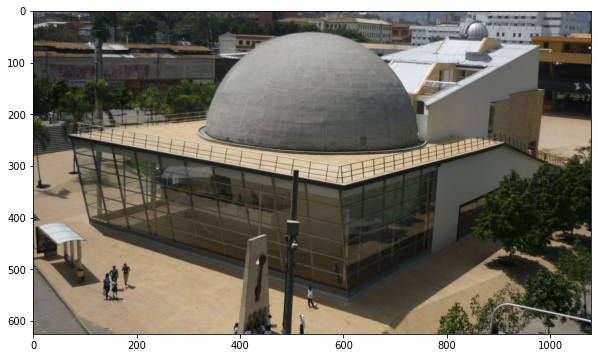

In [ ]:
# 1. Carguemos y mostremos la imagen
plt.figure(figsize=(10, 10))
imagen = plt.imread('planetario.jpg') 
plt.imshow(imagen)
#plt.plot(x_*625, y_*1080, "ro")
plt.show()



In [ ]:
np.shape(imagen)

(625, 1080, 3)

In [290]:
# lista de datos, puntos que estan sobre el domo tomados con gymp
df=pd.DataFrame({ 'X':[323,338,350,360,374,392,413,437,459,488,512,530,548,573,605,624,651,677,698,713,731,740,743,746],
                  'Y':[227,198,173,150,126,105,86,71,59,50,45,42,44,45,54,62,77,96,120,146,180,210,231,251]} )
df  # imprimo el data frame 

,X,Y
0,323,227
1,338,198
2,350,173
3,360,150
4,374,126
5,392,105
6,413,86
7,437,71
8,459,59
9,488,50


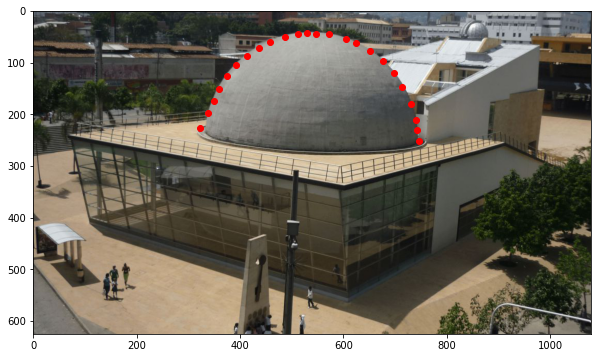

In [ ]:
# graficando los puntos sobre el domo 
plt.figure(figsize=(10, 10))# tamano de la imagen 
imagen = plt.imread('planetario.jpg') # leo la imagen 
plt.imshow(imagen)#muestro la imagen 
df=pd.DataFrame({ 'X':[323,338,350,360,374,392,413,437,459,488,512,530,548,573,605,624,651,677,698,713,731,740,743,746], 
                  'Y':[227,198,173,150,126,105,86,71,59,50,45,42,44,45,54,62,77,96,120,146,180,210,231,251]} )

plt.plot(df.X,df.Y,"ro")# marco los punto "rojos" estan sobre el domo 
plt.show()




(300.0, 800.0)

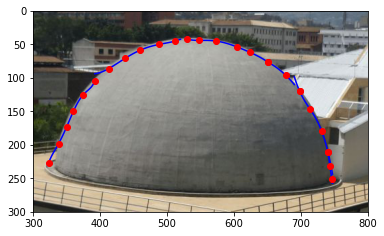

In [267]:
             ######   INTERPOLACION DE LAGRANGE    ########

# graficando los puntos sobre el domo  y la grafica de interpolacion de LAGRANGE


imagen = plt.imread('planetario.jpg') # leo la imagen # leer la imagen
plt.imshow(imagen)#muestro la imagen 

########################################################################

# dividiendo la interpolacion de lagrange en tramos, en total 6 tramos pueS he tenido pRolemas haciendo la intepolacion con todos los puntos
# parte 1
df=pd.DataFrame({ 'X':[323,338,350,360,374,392],
                  'Y':[227,198,173,150,126,105]} )   # datos en un diccionario 
P=interpolate.lagrange(df.X,df.Y)
x=np.linspace(323,392) # primer intervalo
plt.plot(x,P(x), "b") #grafica de interpolacion lagrange en el primer tramo
######################################################################
#parte 2
df_2=pd.DataFrame({ 'X':[413,437,459,488,512],
                  'Y':[86,71,59,50,45]} )
P=interpolate.lagrange(df_2.X,df_2.Y)
x_2=np.linspace(392,520)#segundo intervalo
plt.plot(x_2,P(x_2), "b")# grafica de interpolacion de lagrange para el segundo tramo
######################################################################
#parte 3
df_3=pd.DataFrame({ 'X':[530,548,573,605,624,651],
                  'Y':[42,44,45,54,62,77]} )
P=interpolate.lagrange(df_3.X,df_3.Y)
x_3=np.linspace(528,651)  # tercer intervalo
plt.plot(x_3,P( x_3),'b-')# grafica de interpolacion de lagrange para el tercer tramo
######################################################################
#parte 4

df_4=pd.DataFrame({ 'X':[651,677,698],
                  'Y':[77,96,120]} )
P=interpolate.lagrange(df_4.X,df_4.Y)
x_4=np.linspace(651,690) # cuarto intervalo
plt.plot(x_4,P( x_4),'b-')# grafica de interpolacion de lagrange para el cuarto tramo
######################################################################
#parte 5
df_5=pd.DataFrame({ 'X':[698,713,731,740],
                  'Y':[120,146,180,210]} )
P=interpolate.lagrange(df_5.X,df_5.Y)
x_5=np.linspace(690,747) # quinto intervalo
plt.plot(x_5,P( x_5),'b-')# grafica de interpolacion de lagrange para el quinto tramo

######################################################################
#parte 6
df_6=pd.DataFrame({ 'X':[740,743,746],
                  'Y':[210,231,251]} )
P=interpolate.lagrange(df_6.X,df_6.Y)
x_6=np.linspace(740,747)# ultimo intervalo
plt.plot(x_6,P( x_6),'b-') # grafica interpolacion de lagrange en el ultimo tramo

# aqui grafico  los puntos de los diferentes intervalos para mirar que por todos para la curva de ajusta en la interpol lagrange
plt.plot(df.X,df.Y,"ro")# marco los punto "rojos" estan sobre el domo 
plt.plot(df_2.X,df_2.Y,"ro")
plt.plot(df_3.X,df_3.Y,"ro")
plt.plot(df_4.X,df_4.Y,"ro")
plt.plot(df_5.X,df_5.Y,"ro")
plt.plot(df_6.X,df_6.Y,"ro")
plt.ylim(300,0)
plt.xlim(300,800)


/usr/local/lib/python3.7/dist-packages/numpy/polynomial/hermite.py:1391: RankWarning: The fit may be poorly conditioned
  return pu._fit(hermvander, x, y, deg, rcond, full, w)


(300.0, 800.0)

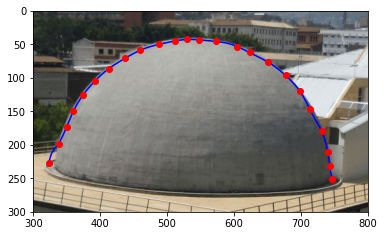

In [278]:
                  ##############      POLINOMIO DE HERMIT     #################


# graficando los puntos sobre el domo  y la grafica de interpolacion de HERMIT


imagen = plt.imread('planetario.jpg') # leo la imagen # leer la imagen
plt.imshow(imagen)#muestro la imagen 
# lista de datos, puntos que estan sobre el domo tomados con gymp
df=pd.DataFrame({ 'X':[323,338,350,360,374,392,413,437,459,488,512,530,548,573,605,624,651,677,698,713,731,740,743,746],
                  'Y':[227,198,173,150,126,105,86,71,59,50,45,42,44,45,54,62,77,96,120,146,180,210,231,251]} )
df
H=np.polynomial.hermite.Hermite.fit(df.X,df.Y,22) # aplicacion del polinomio de Hermit con n-1 elementos del DataFrame   para mi caso n=23-1=22     
x=np.linspace(df.X.min(),df.X.max(),100) # formo un arrglo entre el max y el min del domio, formarlo con 100 puntos
plt.plot(x,H(x),"b")# grafico el polnomio de Hermit( curva de ajuste)
plt.plot(df.X,df.Y,'ro')# grafico los puntos sobre el domo 
plt.ylim(300,0)
plt.xlim(300,800)

(300.0, 800.0)

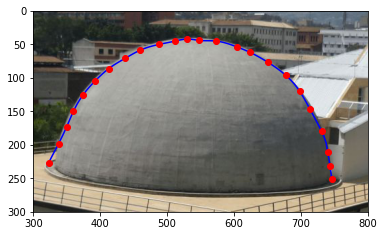

In [289]:
                        ######    SPLINES CUBICOS   #########


from scipy.interpolate import CubicSpline   # importando libreria para spline cubico

# graficando los puntos sobre el domo  y la grafica de interpolacion splines cubicos

imagen = plt.imread('planetario.jpg') # leo la imagen # leer la imagen
plt.imshow(imagen)#muestro la imagen 

Cs = CubicSpline(df.X, df.Y)# funcion de SPLINE CUBICOS , los argumento df.x y df.y son arreglos 
x=np.linspace(df.X.min(),df.X.max(),100) # formo un arrglo entre el max y el min del dominio, formarlo con 100 puntos
plt.plot(x,Cs(x),"b")# grafica con el splines cubicos( curva de ajuste)
plt.plot(df.X,df.Y,'ro')# grafico los puntos sobre el domo 
plt.ylim(300,0)
plt.xlim(300,800)



LA INTERPOLACION DE HERMIT Y LA INTERPOLACION POR LOS SPLINES CUBICOS PRESENTAN  UN AJUSTE MUY BUENO QUE PASA POR TODOS LOS PUNTOS SOBRE EL DOMO SIN PRESENTAR DISCONTINUIDADES. A DIFERENCIA DE LA INTERPOLACION DE LAGRANGE QUE SI PRESENTA DISCONTINUIDADES, NOTIVO POR EL CUAL AL REALIZAR EL AJUSTE, ESTE SE TRABAJO POR TRAMOS,EN EL GRAFICO DE LA INTERPOLACION DE LAGRANGE PUEDE NOTARSE LOS TRAMOS Y ALGUNAS DISCONTINUIDADES (OSCILACIONES), LA DISCONTINUIDADES NO SON MUY NOTALBLE PUES AJUSTE LOS PUNTOS PARA HACER QUE CASI NO SE NOTEN.